In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [5]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

X_train=X_train/255.0
X_test=X_test/255.0

In [6]:
print("shape of X_train:",X_train.shape)
print("shape of Y_train:",Y_train.shape)
print("shape of X_test:",X_test.shape)
print("shape of X_test:",Y_test.shape)


shape of X_train: (2000, 100, 100, 3)
shape of Y_train: (2000, 1)
shape of X_test: (400, 100, 100, 3)
shape of X_test: (400, 1)


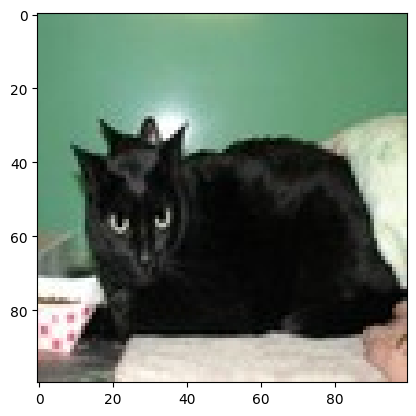

In [7]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()
        

In [8]:
model= Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.fit(X_train,Y_train,epochs=9,batch_size=64)

Epoch 1/9


32/32 [==============================] - 4s 94ms/step - loss: 0.7066 - accuracy: 0.5420
Epoch 2/9
32/32 [==============================] - 3s 88ms/step - loss: 0.6407 - accuracy: 0.6380
Epoch 3/9
32/32 [==============================] - 3s 91ms/step - loss: 0.5812 - accuracy: 0.6855
Epoch 4/9
32/32 [==============================] - 3s 89ms/step - loss: 0.5055 - accuracy: 0.7515
Epoch 5/9
32/32 [==============================] - 3s 89ms/step - loss: 0.4596 - accuracy: 0.7815
Epoch 6/9
32/32 [==============================] - 3s 88ms/step - loss: 0.4149 - accuracy: 0.8130
Epoch 7/9
32/32 [==============================] - 3s 86ms/step - loss: 0.3469 - accuracy: 0.8515
Epoch 8/9
32/32 [==============================] - 3s 91ms/step - loss: 0.3320 - accuracy: 0.8655
Epoch 9/9
32/32 [==============================] - 3s 84ms/step - loss: 0.2667 - accuracy: 0.8945


In [11]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 0s 15ms/step - loss: 0.7342 - accuracy: 0.6750


[0.7341755628585815, 0.675000011920929]

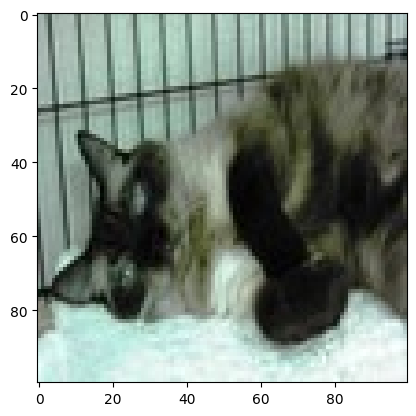

1/1 [==============================] - 0s 96ms/step


In [12]:
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))

In [13]:
if y_pred>0.5:
    print('MODEL PREDICTED:cat')
else :
    print('MODEL PREDICTED:dog')

MODEL PREDICTED:cat
